In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


In [25]:
from zipfile import ZipFile

data_path = 'trainingSample.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [26]:
path = 'data'
classes = os.listdir(path)
#classes
print(classes)


['one', 'zero']


In [27]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

one_dir = os.path.join('data/zero')
two_dir = os.path.join('data/one')

cat_names = os.listdir(one_dir)
dog_names = os.listdir(two_dir)

pic_index = 210

one_images = [os.path.join(one_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
two_images = [os.path.join(one_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(one_images + two_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


<Figure size 1600x1600 with 0 Axes>

In [28]:
base_dir = 'trainingSample'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
'''test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='1',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)'''

Found 600 files belonging to 10 classes.
Using 540 files for training.


"test_datagen = image_dataset_from_directory(base_dir,\n                                                  image_size=(200,200),\n                                                  subset='1',\n                                                  seed = 1,\n                                                 validation_split=0.1,\n                                                  batch_size= 32)"

In [29]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


In [30]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [32]:
history = model.fit(train_datagen,
          epochs=10)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 605ms/step - accuracy: 0.1186 - loss: 0.7368
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 586ms/step - accuracy: 0.1081 - loss: 0.2217
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 595ms/step - accuracy: 0.0836 - loss: -2.6403
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.0983 - loss: -5.0054
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.1080 - loss: -7.9715
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 578ms/step - accuracy: 0.1295 - loss: -11.3907
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.1018 - loss: -17.1892
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 595ms/step - accuracy: 0.0983 - loss: -22.0596
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 585ms/step - accuracy: 0.1058 - loss: -30.6407
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 598ms/step - accuracy: 0.1027 - loss: -39.7822


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1


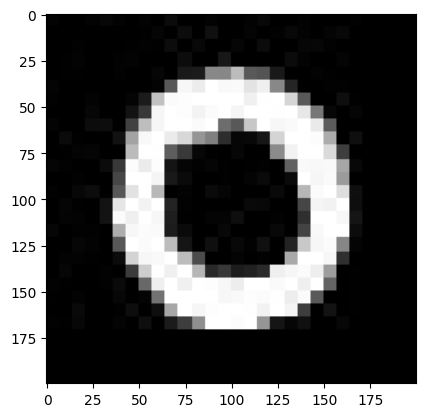

In [33]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('img_1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("0")
else:
  print("1")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The image is classified as: 0


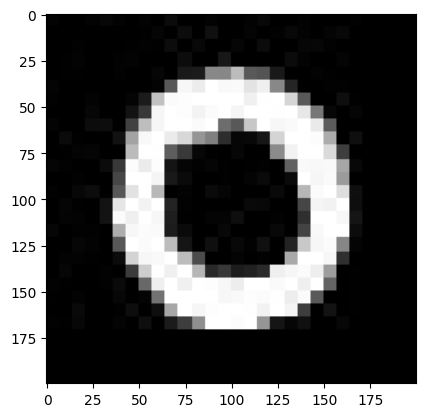

In [35]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('img_1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)



# Get the predicted class
predicted_class = np.argmax(result, axis=1)[0]

# Map the predicted class to the label (assuming class indices are 0-9)
class_labels = list(range(10))  # List of class labels
predicted_label = class_labels[predicted_class]

print(f'The image is classified as: {predicted_label}')